Total images loaded: 1203
Image data shape: (1203, 224, 224, 3)
Label data shape: (1203,)


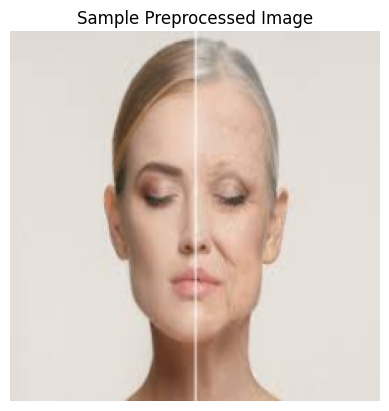

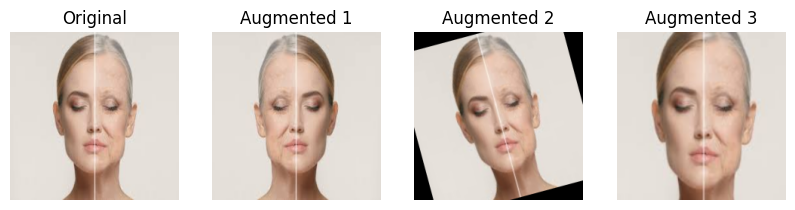

One-hot label shape: (1203, 4)


In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
data_dir = r"C:\Users\akhta\Downloads\Downloads 2025\Self Development\Projects\DermalScan\Dermal Scan Main\dataset_clean"

classes = ["wrinkles", "dark spots", "puffy eyes", "clear skin"]
img_size = 224
X = []
y = []

for idx, cls in enumerate(classes):
    folder_path = os.path.join(data_dir, cls)
    
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, img_name)
            
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(idx)

print("Total images loaded:", len(X))
X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

print("Image data shape:", X.shape)
print("Label data shape:", y.shape)
sample_img = (X[0] * 255).astype("uint8")
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.title("Sample Preprocessed Image")
plt.axis("off")
plt.show()
def augment_image(img):
    augmented = []
    
    # horizontal flip
    augmented.append(cv2.flip(img, 1))
    
    # rotate
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 15, 1)
    augmented.append(cv2.warpAffine(img, M, (w, h)))
    
    # zoom
    zoom = img[20:200, 20:200]
    zoom = cv2.resize(zoom, (img_size, img_size))
    augmented.append(zoom)
    
    return augmented
original = (X[0] * 255).astype("uint8")
augmented_imgs = augment_image(original)

plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

for i, aug in enumerate(augmented_imgs):
    
    plt.subplot(1,4,i+2)
    plt.imshow(cv2.cvtColor(aug, cv2.COLOR_BGR2RGB))
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.show()
num_classes = len(classes)

y_onehot = np.zeros((y.shape[0], num_classes))
for i, label in enumerate(y):
    y_onehot[i, label] = 1

print("One-hot label shape:", y_onehot.shape)
